#Hareetima

Import Necessary Libraries



Import pandas for data manipulation, re for regular expressions, and nltk for natural language processing.


In [36]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

Download NLTK Data

Download necessary NLTK data files for tokenization, stopwords, and lemmatization.


In [37]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\haree\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Load the uncleaned Dataset

Load the dataset into a pandas DataFrame.


In [38]:
file_path = 'uncleaned.csv'
df = pd.read_csv(file_path)

Display the first few rows of the dataset

In [39]:
print("Original Data:")
df.head(10)

Original Data:


,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,10/16/2016 23:55,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,11/1/2016 0:24,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,9/22/2016 21:45,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,10/18/2016 21:03,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,12/30/2016 17:00,Yep can confirm I saw the tool they use for th...
5,0,"I don't pay attention to her, but as long as s...",only7inches,AskReddit,0,0,0,2016-09,9/2/2016 10:35,do you find ariana grande sexy ?
6,0,Trick or treating in general is just weird...,only7inches,AskReddit,1,-1,-1,2016-10,10/23/2016 21:43,What's your weird or unsettling Trick or Treat...
7,0,Blade Mastery+Masamune or GTFO!,P0k3rm4s7,FFBraveExvius,2,-1,-1,2016-10,10/13/2016 21:13,Probably Sephiroth. I refuse to taint his grea...
8,0,"You don't have to, you have a good build, buy ...",SoupToPots,pcmasterrace,1,-1,-1,2016-10,10/27/2016 19:11,What to upgrade? I have $500 to spend (mainly ...
9,0,I would love to see him at lolla.,chihawks,Lollapalooza,2,-1,-1,2016-11,11/21/2016 23:39,Probably count Kanye out Since the rest of his...


Remove duplicates

Remove noise (e.g., missing values)

Ensure only the 'label' and 'comment' columns are retained

In [42]:
#count duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicates: {num_duplicates}")

#Remove duplicates
df = df.drop_duplicates()

#Remove noise (e.g., missing values)
df = df.dropna(subset=['label', 'comment'])

#Ensure only the 'label' and 'comment' columns are retained
df = df[['label', 'comment']]

Number of duplicates: 0


Text cleaning function

In [14]:
def clean_text(text):
    text = text.lower()  # Lowercasing
    text = text.translate(str.maketrans('', '', string.punctuation))  # Removing punctuation
    text = re.sub(r'[^a-z\s]', '', text)  # Removing special characters and numbers
    return text


# Apply text cleaning to the 'comment' column
df['comment'] = df['comment'].apply(clean_text)

Remove stopwords and lemmatize

In [15]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

df['comment'] = df['comment'].apply(preprocess_text)


Save the cleaned dataset to a new CSV file

In [16]:
cleaned_file_path = 'cleaned_comments_FINAL.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to {cleaned_file_path}")
print("cleaned Data:")
df.head(10)

Cleaned dataset saved to cleaned_comments_FINAL.csv
cleaned Data:


,label,comment
0,0,nc nh
1,0,know west team play west team east team right
2,0,underdog earlier today since gronks announceme...
3,0,meme isnt funny none new york nigga one
4,0,could use one tool
5,0,dont pay attention long shes legal wouldnt kic...
6,0,trick treating general weird
7,0,blade masterymasamune gtfo
8,0,dont good build buy game save
9,0,would love see lolla


Checking the distribution of labels

In [17]:
label_counts = df['label'].value_counts()
print("\nLabel distribution:")
print(label_counts)


Label distribution:
label
0    84970
1    65015
Name: count, dtype: int64


In [18]:
# Identifying minority and majority classes
minority_class_size = label_counts.min()
majority_class = label_counts.idxmax()
minority_class = label_counts.idxmin()

# Downsampling the majority class
df_majority = df[df['label'] == majority_class]
df_minority = df[df['label'] == minority_class]
df_majority_downsampled = df_majority.sample(n=minority_class_size, random_state=42)

# Combining the downsampled majority class with the minority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffling the dataset to mix the classes
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

Displaying the new label distribution

In [22]:
new_label_counts = df_balanced['label'].value_counts()
print("\nNew label distribution:")
print(new_label_counts)

cleaned_file_path = 'cleaned_balanced_dataset_FINAL.csv'
df_balanced.to_csv(cleaned_file_path, index=False)


New label distribution:
label
1    65015
0    65015
Name: count, dtype: int64


VISUALIZATION

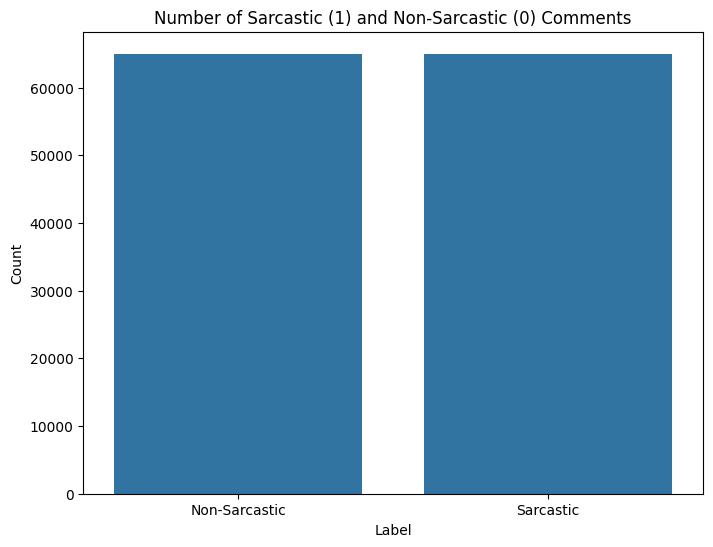

In [23]:
# Import necessary libraries for visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv(cleaned_file_path)

# Visualize the number of 1s and 0s in the 'label' column
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Number of Sarcastic (1) and Non-Sarcastic (0) Comments')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Sarcastic', 'Sarcastic'])
plt.show()


SPLITING THE CLEANED DATASET TO 80% TRAIN AND 20% TEST DATASETS

In [24]:
from sklearn.model_selection import train_test_split
# Separate data into 0s and 1s
data_0 = df_balanced[df_balanced['label'] == 0]
data_1 = df_balanced[df_balanced['label'] == 1]

# Split each into 80% train and 20% test
train_0, test_0 = train_test_split(data_0, test_size=0.2, random_state=1)
train_1, test_1 = train_test_split(data_1, test_size=0.2, random_state=1)

# Combine the training and testing sets
train_data = pd.concat([train_0, train_1])
test_data = pd.concat([test_0, test_1])

# Shuffle the combined training and testing datasets
train_data = train_data.sample(frac=1, random_state=1).reset_index(drop=True)
test_data = test_data.sample(frac=1, random_state=1).reset_index(drop=True)

# Save the training and testing datasets to new CSV files
train_file_path = 'train_dataset_FINAL.csv'
test_file_path = 'test_dataset_FINAL.csv'

train_data.to_csv(train_file_path, index=False)
test_data.to_csv(test_file_path, index=False)

In [26]:
# Display the count of 0s and 1s in the training and testing datasets
train_label_counts = train_data['label'].value_counts()
test_label_counts = test_data['label'].value_counts()

print("Count of 0s and 1s in the 'label' column of the training dataset:")
print(train_label_counts)

print("Count of 0s and 1s in the 'label' column of the testing dataset:")
print(test_label_counts)

print(f"Training dataset saved to {train_file_path}")
print(f"Testing dataset saved to {test_file_path}")



# Display the top 10 rows of the cleaned train dataset
print("Display the top 10 rows of the cleaned TRAIN dataset:")
train_data = pd.read_csv(train_file_path)
print(train_data.head(10))

# Display the top 10 rows of the cleaned test dataset
print("Display the top 10 rows of the cleaned TEST dataset")
test_data = pd.read_csv(test_file_path)
test_data.head(10)

Count of 0s and 1s in the 'label' column of the training dataset:
label
1    52012
0    52012
Name: count, dtype: int64
Count of 0s and 1s in the 'label' column of the testing dataset:
label
1    13003
0    13003
Name: count, dtype: int64
Training dataset saved to train_dataset_FINAL.csv
Testing dataset saved to test_dataset_FINAL.csv
Display the top 10 rows of the cleaned TRAIN dataset:
   label                                            comment
0      1  say large terrorist force invades canada wish ...
1      1             okay extension reasoning malay pm also
2      1                                             better
3      1                                               shut
4      1                         maybe multiple personality
5      1                          im sure palestinian agree
6      1               creeper older pocket edition fanbase
7      0                               go vote manipulation
8      0                                         never scam
9      1 

,label,comment
0,1,love censorship
1,0,wont fix anything pmm got ammo buff next patch
2,1,isnt competitive pve best
3,0,omg beautiful nail im totally stealing impress...
4,0,thought akroyds nixon pretty good
5,1,though wanted sit move section
6,0,thats kind amazing though
7,0,sporting event winner stock market etc basical...
8,1,maybe shes high priced call girl
9,0,got penalty watching dive


# SUMMARY
In this code, we performed a series of data cleaning steps on a dataset containing comments labeled as sarcastic or non-sarcastic. We began by importing necessary libraries like pandas, numpy, re, and NLTK tools for text processing. We downloaded NLTK stopwords and wordnet data for text cleaning purposes.

Next, we loaded the dataset from a CSV file and removed duplicate rows to ensure unique entries. We also eliminated rows with missing values in the 'label' and 'comment' columns. We ensured the dataset contained only the 'label' and 'comment' columns and filtered the data to retain only rows with labels 0 and 1.

A text cleaning function was defined to convert text to lowercase and remove special characters and numbers. We applied this function to the 'comment' column. Additionally, we performed optional preprocessing steps: removing stopwords and lemmatizing the text to reduce words to their root form. This was done using NLTK's stopwords and WordNetLemmatizer.

Then, we saved the cleaned dataset to a new CSV file, ensuring the data was properly prepared for further analysis or modeling.

Later, we split the cleaned dataset into train and test dataset, also ensuring that there are equal number of sarcastic and non-sarcastic comments for efficient training of our model. 

Finally, we saved the cleaned, balanced train and test data into new CSV files, ensuring the data was properly prepared for further analysis or modeling.